In [40]:
@time include("../src/federn/my.jl");

  3.590906 seconds (21.93 M allocations: 592.519 MB, 24.60% gc time)



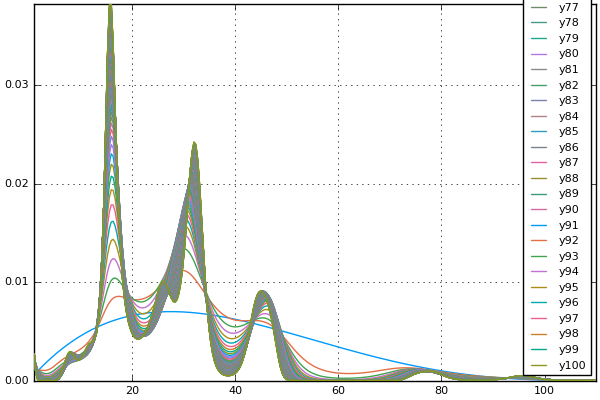

In [48]:
using Plots
s = xmax
pi_0(x) = (x/s).*(1-x/s).^3.*(x/s.>0).*(x/s.<1)*20/s
w0=pi_0(collect(samples))
w0=w0/sum(w0)

plot(samples, ws_em(w0, 100))


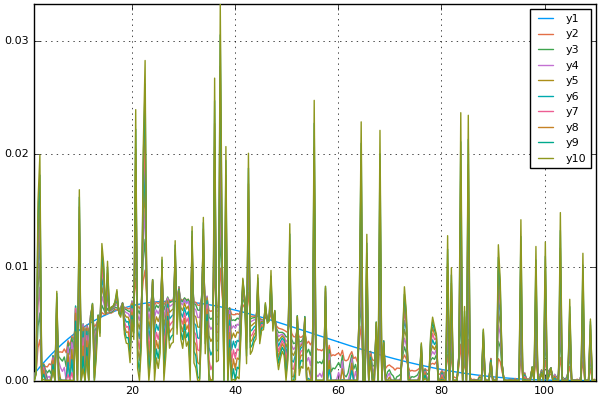

In [19]:
plot(samples, ws_pml_ga(w0, 10))

In [20]:
Lzz

300×300 Array{Float64,2}:
 0.00192284   0.00091938   0.00045818   …  0.00013036   0.000118424
 0.00179778   0.00305186   0.00371431      0.000109124  0.000106787
 0.000125077  0.000451845  0.000742371     0.000288944  0.0003181  
 5.78699e-5   0.00027285   0.000548956     0.000102946  0.000114578
 0.00409393   0.00504629   0.0046931       0.000511411  0.000497945
 0.000836778  0.00252198   0.00434579   …  0.000119608  0.000123254
 0.000223284  0.000866962  0.0019049       1.11468e-5   1.14231e-5 
 0.00133002   0.00294417   0.00425604      0.000100188  0.000100056
 0.00427626   0.00600091   0.00592644      0.000870665  0.000862724
 9.79619e-5   4.82506e-5   2.78779e-5      8.73281e-7   7.63416e-7 
 0.000339106  0.0012968    0.00271575   …  3.07505e-5   3.18586e-5 
 0.000517414  0.000318653  0.000205383     9.74819e-6   8.76673e-6 
 1.82501e-6   3.02302e-6   4.59888e-6      2.39289e-9   2.16704e-9 
 ⋮                                      ⋱                          
 0.00210172   0.000620

In [26]:
randw = rand(300)
randw = randw/sum(randw)
GynC.Hz(randw, Lzz)

5.846944566838026

In [24]:
GynC.Hz(w0, Lzz)

5.884310834835437

In [32]:
wpml = ws_pml_ga(w0, 10)[end]

300-element Array{Float64,1}:
 0.0        
 0.00052338 
 0.0158082  
 0.0199222  
 0.0        
 0.000103929
 0.0        
 0.0        
 0.0        
 0.0        
 0.000960409
 0.0        
 0.00787706 
 ⋮          
 0.0        
 0.0        
 0.0        
 0.0        
 0.0112351  
 0.0        
 0.0        
 0.0        
 0.00543161 
 0.0        
 0.0        
 0.0        

In [33]:
GynC.Hz(wpml, Lzz)

7.129430903165402

In [34]:
GynC.Hz(ones(300)/300, Lzz)

5.895972643552732

In [38]:
mybeta(x,s) = (x/s).*(1-x/s).^3.*(x/s.>0).*(x/s.<1)*20/s
betap = map(x->mybeta(x,10), samples)

300-element Array{Float64,1}:
  0.1458  
  0.175741
  0.195663
  0.206948
  0.210898
  0.208726
  0.201563
  0.190454
  0.17636 
  0.160156
  0.142633
  0.124498
  0.106372
  ⋮       
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     
 -0.0     

In [39]:
GynC.Hz(betap, Lzz)

LoadError: LoadError: MethodError: no method matching Hz(::Base.Math.#beta, ::Array{Float64,2})
Closest candidates are:
  Hz(!Matched::Array{T,1}, ::Array{T,2}) at /home/numerik/bzfsikor/.julia/v0.5/GynC/src/optim2.jl:15
while loading In[39], in expression starting on line 1

In [60]:
grasl = gradientascent(x->pml(x,0), w0, 10, 0.01, GynC.projectsimplex)

10-element Array{Any,1}:
 [0.000586589,0.000792425,0.000994052,0.00119151,0.00138485,0.00157411,0.00175932,0.00194054,0.0021178,0.00229115  …  1.70722e-6,1.20313e-6,8.08749e-7,5.11027e-7,2.96733e-7,1.5244e-7,6.45264e-8,1.91829e-8,2.40587e-9,0.0]
 [0.0042552,0.00250167,0.000713611,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.00342666,0.00328852,0.00315218,0.00301823,0.0028872,0.00275958,0.00263579,0.00251622,0.00240119,0.002291]                                              
 [0.00327197,0.00194424,0.000150587,0.0,0.0,0.0,0.0,0.000108806,0.000910982,0.00187319  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]                                                                                         
 [0.00619858,0.00428827,0.00147924,3.44461e-5,0.0,0.0,0.0,0.0,0.0,0.0  …  0.00317539,0.00315795,0.00314068,0.00312352,0.00310645,0.00308949,0.00307265,0.003056,0.00303963,0.0030236]                                       
 [0.00631041,0.00463829,0.00171919,0.0,0.0,0.0,0.0,0.000187414,0.000615705,0.00104234  …  0


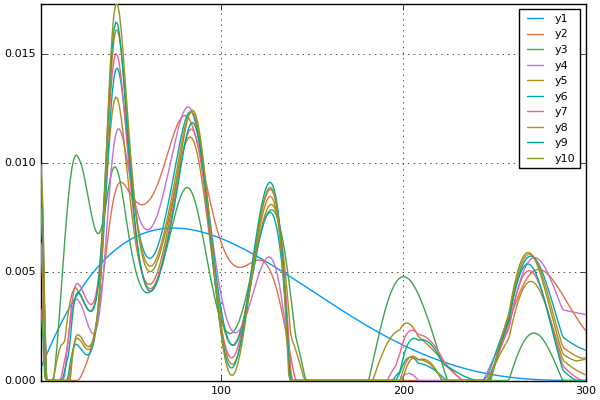

In [61]:
plot(grasl)

In [62]:
map(zentropy, grasl)

10-element Array{Any,1}:
 5.88579
 5.57809
 5.75086
 5.59491
 5.7163 
 5.63337
 5.69417
 5.63929
 5.6876 
 5.64308

In [63]:
map(marginallikelihood, grasl)

10-element Array{Any,1}:
 -6.98136
 -6.86003
 -6.92796
 -6.83045
 -6.82283
 -6.81103
 -6.81139
 -6.80622
 -6.8065 
 -6.80429

In [64]:
Lzz

300×300 Array{Float64,2}:
 0.00371618   0.00161604   0.000699208  …  0.00083439   0.000771755
 0.00442107   0.00603684   0.00554894      0.00208665   0.00209889 
 0.00414611   0.00514913   0.00428724      0.00329251   0.00332703 
 8.9179e-5    0.000502267  0.00134201      1.24575e-5   1.33255e-5 
 1.49183e-8   3.31702e-7   2.57966e-6      3.70325e-10  4.15922e-10
 0.000795669  0.00235896   0.00409015   …  8.5742e-5    8.7775e-5  
 0.000423132  0.000903405  0.00137645      9.19904e-6   8.94381e-6 
 0.00080791   0.00170594   0.00249353      3.01109e-5   2.95702e-5 
 0.00335748   0.0032307    0.00215346      0.00538407   0.00543241 
 0.000368235  0.000931382  0.00158213      9.35004e-6   9.21251e-6 
 7.99063e-7   1.61709e-6   2.87034e-6   …  8.35159e-10  7.62111e-10
 2.18934e-6   3.80217e-6   5.94934e-6      3.1052e-9    2.82456e-9 
 3.24908e-5   2.7096e-5    2.37856e-5      1.30272e-7   1.15719e-7 
 ⋮                                      ⋱                          
 0.0006547    0.000126

In [67]:
grase = gradientascent(zentropy, w0, 10, 0.01, GynC.projectsimplex)

10-element Array{Any,1}:
 [0.000586589,0.000792425,0.000994052,0.00119151,0.00138485,0.00157411,0.00175932,0.00194054,0.0021178,0.00229115  …  1.70722e-6,1.20313e-6,8.08749e-7,5.11027e-7,2.96733e-7,1.5244e-7,6.45264e-8,1.91829e-8,2.40587e-9,0.0]
 [0.0,0.0,0.0,0.00604229,0.034127,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0283216,0.00452801,0.0,0.0,0.00255082,0.0,0.0,0.0]                                                                                                      
 [0.0,0.0,0.0,0.0,0.0570903,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0485542,0.00305427,0.0,0.0,0.0,0.0,0.0,0.0]                                                                                                                   
 [0.0,0.0,0.0,0.0,0.0821879,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0626117,0.0,0.0,0.0,0.0,0.0,0.0,0.0]                                                                                                                          
 [0.0,0.0,0.0,0.0,0.109611,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.074469,0.0,0.0,0.0,0.0,0.0,0.0

In [68]:
map(zentropy, grase)

10-element Array{Any,1}:
 5.88579
 7.23432
 7.82086
 8.15049
 8.38875
 8.63173
 9.05682
 9.35327
 9.56742
 9.69914


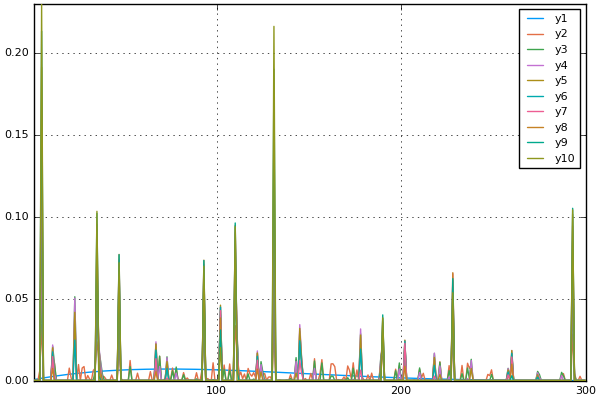

In [69]:
plot(grase)

In [70]:
Lzz

300×300 Array{Float64,2}:
 0.00371618   0.00161604   0.000699208  …  0.00083439   0.000771755
 0.00442107   0.00603684   0.00554894      0.00208665   0.00209889 
 0.00414611   0.00514913   0.00428724      0.00329251   0.00332703 
 8.9179e-5    0.000502267  0.00134201      1.24575e-5   1.33255e-5 
 1.49183e-8   3.31702e-7   2.57966e-6      3.70325e-10  4.15922e-10
 0.000795669  0.00235896   0.00409015   …  8.5742e-5    8.7775e-5  
 0.000423132  0.000903405  0.00137645      9.19904e-6   8.94381e-6 
 0.00080791   0.00170594   0.00249353      3.01109e-5   2.95702e-5 
 0.00335748   0.0032307    0.00215346      0.00538407   0.00543241 
 0.000368235  0.000931382  0.00158213      9.35004e-6   9.21251e-6 
 7.99063e-7   1.61709e-6   2.87034e-6   …  8.35159e-10  7.62111e-10
 2.18934e-6   3.80217e-6   5.94934e-6      3.1052e-9    2.82456e-9 
 3.24908e-5   2.7096e-5    2.37856e-5      1.30272e-7   1.15719e-7 
 ⋮                                      ⋱                          
 0.0006547    0.000126